In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit-data-analysis/Activity (NR).csv
/kaggle/input/fitbit-data-analysis/sleepDay_merged.csv
/kaggle/input/fitbit-data-analysis/Sleep and Activity.csv
/kaggle/input/fitbit-data-analysis/Activity Summary.csv
/kaggle/input/fitbit-data-analysis/Sleep and Activity (NR).csv
/kaggle/input/fitbit-data-analysis/dailyActivity_merged.csv


# # Case study : Bellabeat 

# About the company

Bellabeat, a high-tech company that manufactures health-focused smart products. Bellabeat Collects data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

In this analysis, diffetent datasets will be analysed and the findings will be given.

Various tools such as spreadsheet, SQL, python and tableau are used for the analysis.


# Business task

1. The main task is to analyse the costumer behaviour and design a effective marketing campaign to attract new customers.

2. To identify the target audience

I have framed two questions that this analysis would try to answer,

Why: To design a effective marketing campaign.

How: Gaining customer behaviour insights.


# Key stakeholders

**Internal stakeholders**

1. Urška Sršen

2. Sando Mur

3. Bellabeat Marketing Analytics Team

**External stakeholders**

1. Customers

2. Targeted Audience

In [2]:
# importing required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the datasets

activity_data = pd.read_csv('../input/fitbit-data-analysis/Activity (NR).csv')
sleep_and_activity = pd.read_csv('../input/fitbit-data-analysis/Sleep and Activity (NR).csv')
daily_activity = pd.read_csv('../input/fitbit-data-analysis/dailyActivity_merged.csv')
sleep_day = pd.read_csv('../input/fitbit-data-analysis/sleepDay_merged.csv')
activity_data.head()

,Id,ActivityDay,TotalDistance,TotalActiveHours,SedentaryHours
0,1624580081,01/05/2016,28,7.000000,17.000000
1,8877689391,30/04/2016,27,5.850000,18.150000
2,1503960366,12/05/2016,0,0.000000,24.000000
3,1844505072,19/04/2016,0,0.166667,23.833333
4,1844505072,20/04/2016,0,0.016667,23.983333


In [4]:
sleep_and_activity.head()

,Id,ActivityDay,Average_sleep_hours,Average_time_in_bed_hours,Average_calories,Average_steps,TotalDistance
0,1503960366,12/04/2016,5.450000,5.766667,1985,13162,9
1,1503960366,13/04/2016,6.400000,6.783333,1797,10735,8
2,1503960366,15/04/2016,6.866667,7.366667,1745,9762,6
3,1503960366,16/04/2016,5.666667,6.116667,1863,12669,8
4,1503960366,17/04/2016,11.666667,11.866667,1728,9705,7


In [5]:
daily_activity.head()

,Id,ActivityDay,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,StepTotal
0,1503960366,12/04/2016,1985,728,328,13,25,0,6,1,2,13162
1,1503960366,13/04/2016,1797,776,217,19,21,0,5,1,2,10735
2,1503960366,14/04/2016,1776,1218,181,11,30,0,4,0,2,10460
3,1503960366,15/04/2016,1745,726,209,34,29,0,3,1,2,9762
4,1503960366,16/04/2016,1863,773,221,10,36,0,5,0,3,12669


In [6]:
sleep_day.head()

,Id,SleepDay,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,12/04/2016,00:00:00,1,327,346
1,1503960366,13/04/2016,12:00:00,2,384,407
2,1503960366,15/04/2016,12:00:00,1,412,442
3,1503960366,16/04/2016,12:00:00,2,340,367
4,1503960366,17/04/2016,12:00:00,1,700,712


# Cleaning

In [7]:
# droping features (sleepday, activityday) in sleep_day and activity_data as they are incorrect

sleep_day = sleep_day.drop(['SleepDay', 'Time'], axis=1)
activity_data = activity_data.drop('ActivityDay', axis=1)
sleep_and_activity = sleep_and_activity.drop('ActivityDay', axis=1)
daily_activity = daily_activity.drop('ActivityDay', axis=1)


In [8]:
# checking for any null values and proper datatypes

activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                940 non-null    int64  
 1   TotalDistance     940 non-null    int64  
 2   TotalActiveHours  940 non-null    float64
 3   SedentaryHours    940 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 29.5 KB


In [9]:
sleep_and_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         410 non-null    int64  
 1   Average_sleep_hours        410 non-null    float64
 2   Average_time_in_bed_hours  410 non-null    float64
 3   Average_calories           410 non-null    int64  
 4   Average_steps              410 non-null    int64  
 5   TotalDistance              410 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.3 KB


In [10]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Id                        940 non-null    int64
 1   Calories                  940 non-null    int64
 2   SedentaryMinutes          940 non-null    int64
 3   LightlyActiveMinutes      940 non-null    int64
 4   FairlyActiveMinutes       940 non-null    int64
 5   VeryActiveMinutes         940 non-null    int64
 6   SedentaryActiveDistance   940 non-null    int64
 7   LightActiveDistance       940 non-null    int64
 8   ModeratelyActiveDistance  940 non-null    int64
 9   VeryActiveDistance        940 non-null    int64
 10  StepTotal                 940 non-null    int64
dtypes: int64(11)
memory usage: 80.9 KB


In [11]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Id                  413 non-null    int64
 1   TotalSleepRecords   413 non-null    int64
 2   TotalMinutesAsleep  413 non-null    int64
 3   TotalTimeInBed      413 non-null    int64
dtypes: int64(4)
memory usage: 13.0 KB


In [12]:
# merging the data

final_data = pd.merge(activity_data, daily_activity)
final_data

,Id,TotalDistance,TotalActiveHours,SedentaryHours,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,StepTotal
0,1624580081,28,7.000000,17.000000,1432,1294,146,0,0,0,5,0,0,8163
1,1624580081,28,7.000000,17.000000,1411,1292,148,0,0,0,5,0,0,7007
2,1624580081,28,7.000000,17.000000,1572,1204,236,0,0,0,6,0,0,9107
3,1624580081,28,7.000000,17.000000,1344,1344,96,0,0,0,1,0,0,1510
4,1624580081,28,7.000000,17.000000,1463,1264,176,0,0,0,3,0,0,5370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27795,8378563200,13,4.483333,9.883333,2685,621,139,0,0,0,2,0,0,2943
27796,8378563200,13,4.483333,9.883333,3721,772,171,13,71,0,5,1,1,8382
27797,8378563200,13,4.483333,9.883333,3586,840,152,13,63,0,4,1,1,6582
27798,8378563200,13,4.483333,9.883333,3788,763,184,10,72,0,5,1,1,9143


# Creating new feature

In [13]:
# creating a new feature to see hours stayed awake in bed
sleep_and_activity['average_time_awake_in_bed'] = sleep_and_activity['Average_time_in_bed_hours'] - sleep_and_activity['Average_sleep_hours']
sleep_and_activity.head()

,Id,Average_sleep_hours,Average_time_in_bed_hours,Average_calories,Average_steps,TotalDistance,average_time_awake_in_bed
0,1503960366,5.450000,5.766667,1985,13162,9,0.316667
1,1503960366,6.400000,6.783333,1797,10735,8,0.383333
2,1503960366,6.866667,7.366667,1745,9762,6,0.500000
3,1503960366,5.666667,6.116667,1863,12669,8,0.450000
4,1503960366,11.666667,11.866667,1728,9705,7,0.200000


In [14]:
# creating a new feature to fing total distance covered by walking

sleep_and_activity['Walk_kilometer'] = sleep_and_activity['Average_steps']/1312.3
sleep_and_activity.head()

,Id,Average_sleep_hours,Average_time_in_bed_hours,Average_calories,Average_steps,TotalDistance,average_time_awake_in_bed,Walk_kilometer
0,1503960366,5.450000,5.766667,1985,13162,9,0.316667,10.029719
1,1503960366,6.400000,6.783333,1797,10735,8,0.383333,8.180294
2,1503960366,6.866667,7.366667,1745,9762,6,0.500000,7.438848
3,1503960366,5.666667,6.116667,1863,12669,8,0.450000,9.654043
4,1503960366,11.666667,11.866667,1728,9705,7,0.200000,7.395413


# Analyse

<AxesSubplot:xlabel='SedentaryHours', ylabel='Density'>

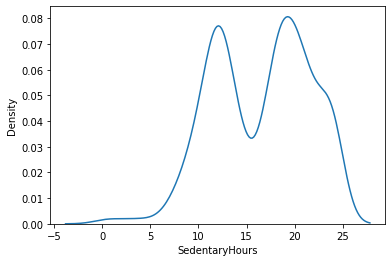

In [15]:
# identify who's our target audience

# determining the user's age

sns.kdeplot(activity_data['SedentaryHours'])

we can see the sedentary hours peaks as 12 and 20. So, we can infer that our target audience are mostly college students and working professionals.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VeryActiveMinutes', ylabel='Calories'>

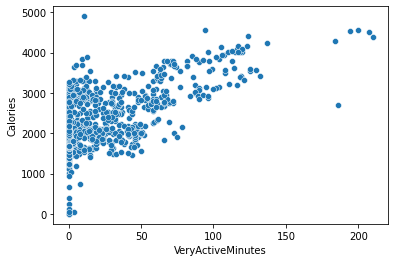

In [16]:
sns.scatterplot(daily_activity['VeryActiveMinutes'], daily_activity['Calories'])

We can see there is increase in calories burned with increase in very active minutes

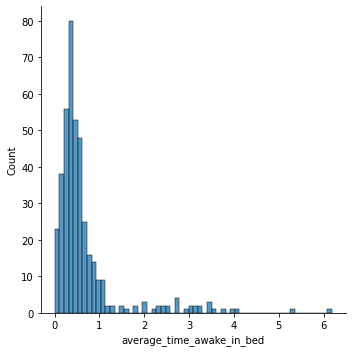

In [17]:
sns.displot(sleep_and_activity['average_time_awake_in_bed'])

we can see most people spend on average of half an hour staying awake at bed 

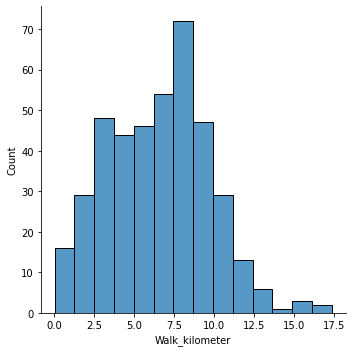

In [18]:
sns.displot(sleep_and_activity['Walk_kilometer'])

# Inference

* The sedentary hours peaks at 12 and 20. So most of our target audience are students and working professionals. Our customers age range from 17-35.

* Most of the users spends on an average of half an hour in bed staying awake.

* There's a increase in calories burnt with increase in very active minutes.

* Most of the users walks on an average of 6-8 kms daily.



# Marketing campaign ideas

* Our target audience age range from 17-35. So advertisements and posts through social media platform would be effective strategy.

* Promoting our products through brand ambassador, social media influencers, advertisements and creating social CRM are the effective ways to design a marketing campaign.

* We can develope an app to seamlessly connect to the user mobile devices.

* We see that the most user spend about half an hour staying awake at bed, so we send them a notification through the app to remaind them to sleep.

* Bill boards and banners can be placed on road side, public transport where workers and students usually commute.

* We can see that the calories burnt increases with the very active minute, so we allow user to set a goal that enables them to da certain activity on a day to day basis.
